In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]

# Test what we can do with images

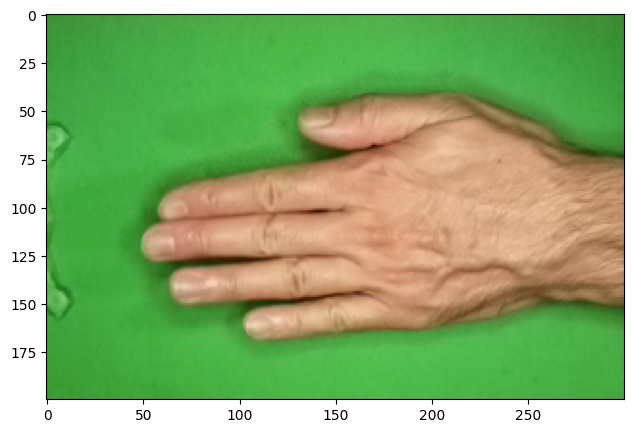

In [2]:
image = np.array(Image.open('data/rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png'))
plt.imshow(image)
plt.show()

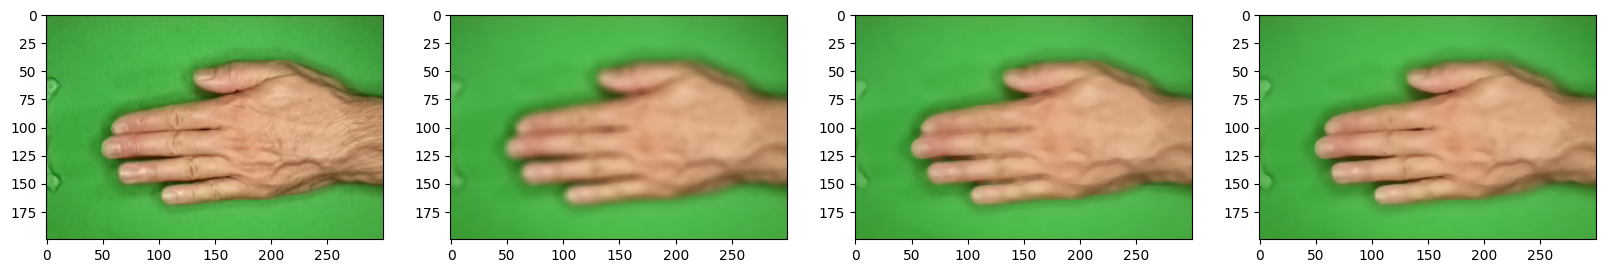

In [15]:
import cv2

fig, ax = plt.subplots(1,4)
ax[0].imshow(image)
ax[1].imshow(cv2.GaussianBlur(image, (7,7), 5))
ax[2].imshow(cv2.medianBlur(image, 7))
ax[3].imshow(cv2.bilateralFilter(image, 9, 75, 75))
plt.show()

In [36]:
flipped1 = tf.image.flip_left_right(image)
flipped2 = tf.image.flip_up_down(image)
flipped3 = tf.image.flip_up_down(flipped1)
flipped = [image, flipped1, flipped2, flipped3]

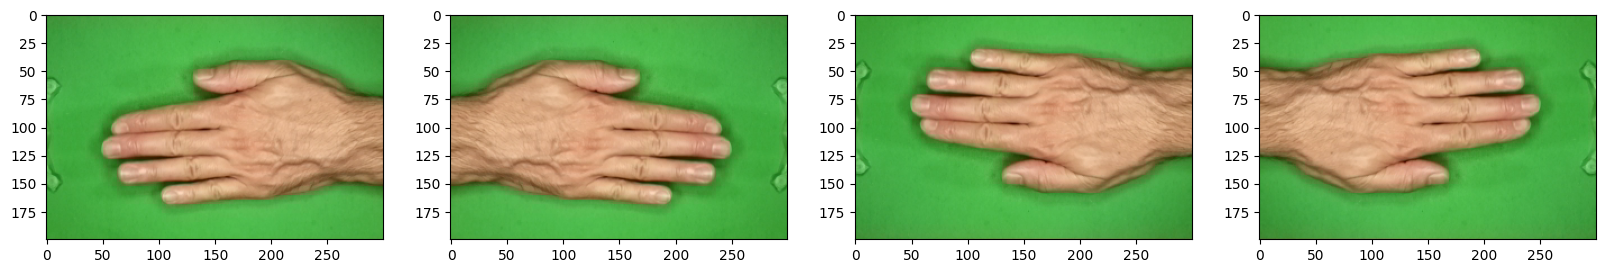

In [37]:
fig, ax = plt.subplots(1, len(flipped))
for i,img in enumerate(flipped):
    ax[i].imshow(img)
plt.show()

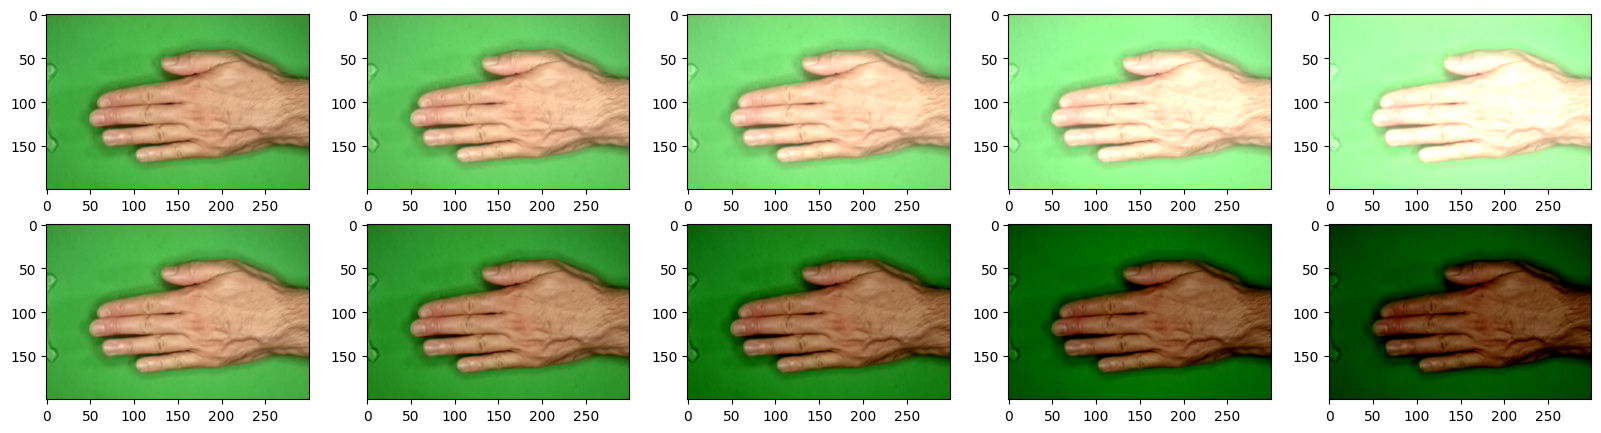

In [59]:
N,M = 2,5
fig, ax = plt.subplots(N, M)
for i in range(N):
    for j in range(M):
        ax[i,j].imshow(tf.image.adjust_brightness(image, (j/10)*(-1)**i))
plt.show()

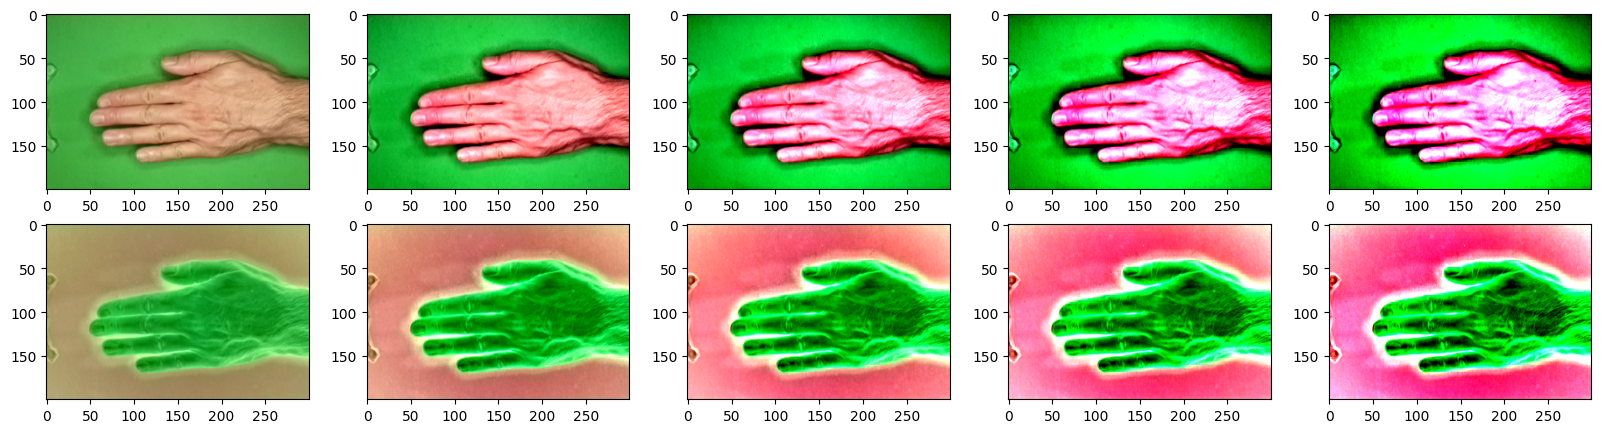

In [66]:
N,M = 2,5
fig, ax = plt.subplots(N, M)
for i in range(N):
    for j in range(M):
        ax[i,j].imshow(tf.image.adjust_contrast(image, (j+1)*(-1)**i))
plt.show()

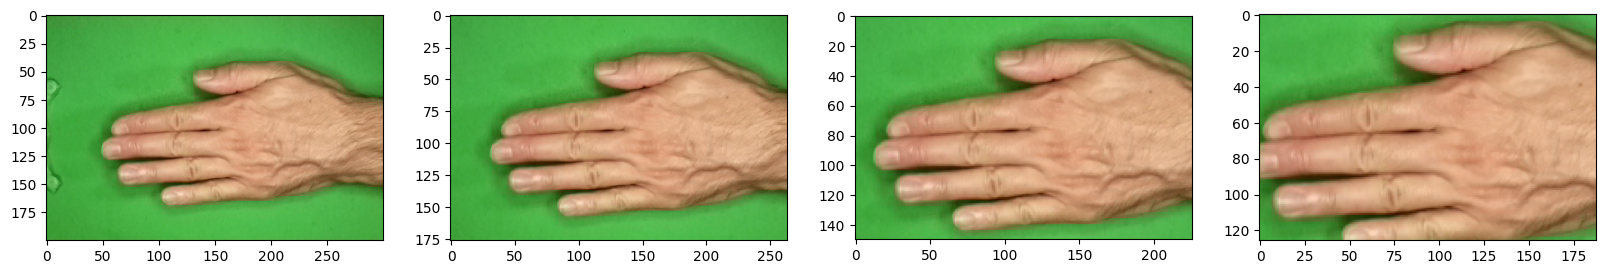

In [82]:
N = 4
fig, ax = plt.subplots(1, N)
for i in range(N):
    ax[i].imshow(tf.image.central_crop(image, 1-i/8))
plt.show()

In [116]:
grayscale = np.array(tf.image.grayscale_to_rgb(tf.image.rgb_to_grayscale(image)))

no_red = image.copy()
no_red[:,:,0] = 0

no_green = image.copy()
no_green[:,:,1] = 0

no_blue = image.copy()
no_blue[:,:,2] = 0

max_red = image.copy()
max_red[:,:,0] = 255

max_green = image.copy()
max_green[:,:,1] = 255

max_blue = image.copy()
max_blue[:,:,2] = 255

other_colors = np.array([[image, no_red, no_green, no_blue],
                         [grayscale, max_red, max_green, max_blue]])

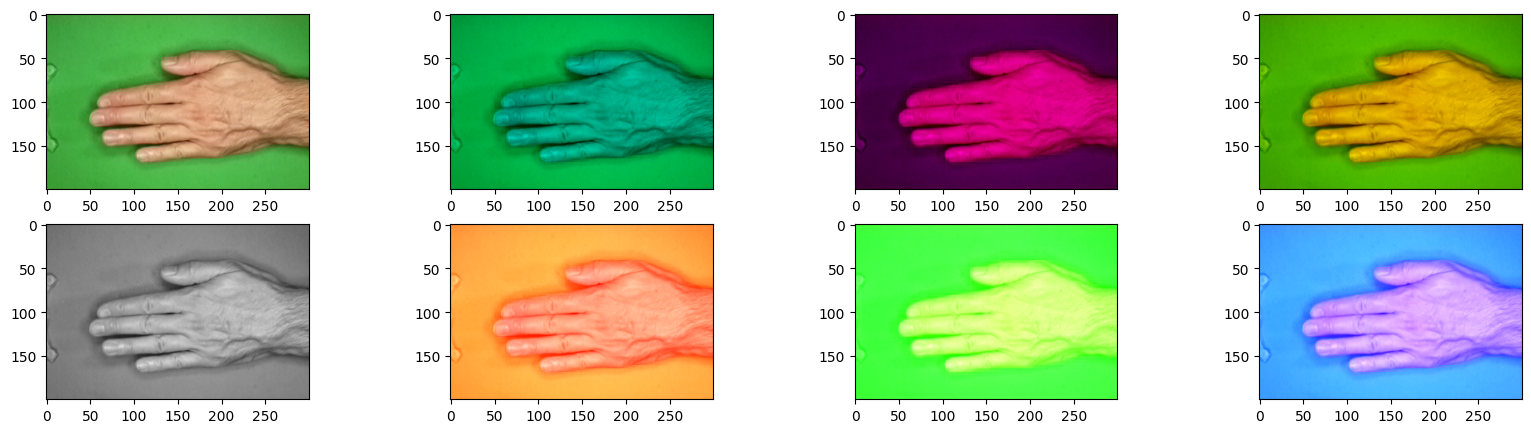

In [119]:
N, M = other_colors.shape[0], other_colors.shape[1]
fig, ax = plt.subplots(N, M)
for i in range(N):
    for j in range(M):
        ax[i,j].imshow(other_colors[i,j])
plt.show()

# KNN on augmented dataset

In [16]:
class_names = ['rock', 'paper', 'scissors']

In [17]:
def read_dataset():
    color_transform = np.array([65536, 256, 1])
    X, y = [], []

    for class_id, class_name in enumerate(class_names):
        for filename in os.listdir(f'./data/rockpaperscissors/{class_name}'):
            image = np.array(Image.open(f'./data/rockpaperscissors/{class_name}/{filename}'))

            flipped1 = np.array(tf.image.flip_left_right(image))
            # flipped2 = np.array(tf.image.flip_up_down(image))
            # flipped3 = np.array(tf.image.flip_up_down(flipped1))
            flipped = [image, flipped1] #, flipped2, flipped3]

            for f in flipped:
                X.append(f.dot(color_transform).flatten())
                y.append(class_id)

    permutation = np.random.permutation(len(y))
    return np.array(X)[permutation], np.array(y)[permutation]

In [23]:
X, y = read_dataset()

In [24]:
# size in GB
X.size * 8 / 1e9

2.10048

In [25]:
TRAIN_SIZE = int(0.8 * y.shape[0])
X_train, y_train = X[:TRAIN_SIZE], y[:TRAIN_SIZE]
X_test, y_test = X[TRAIN_SIZE:], y[TRAIN_SIZE:]

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.9383561643835616

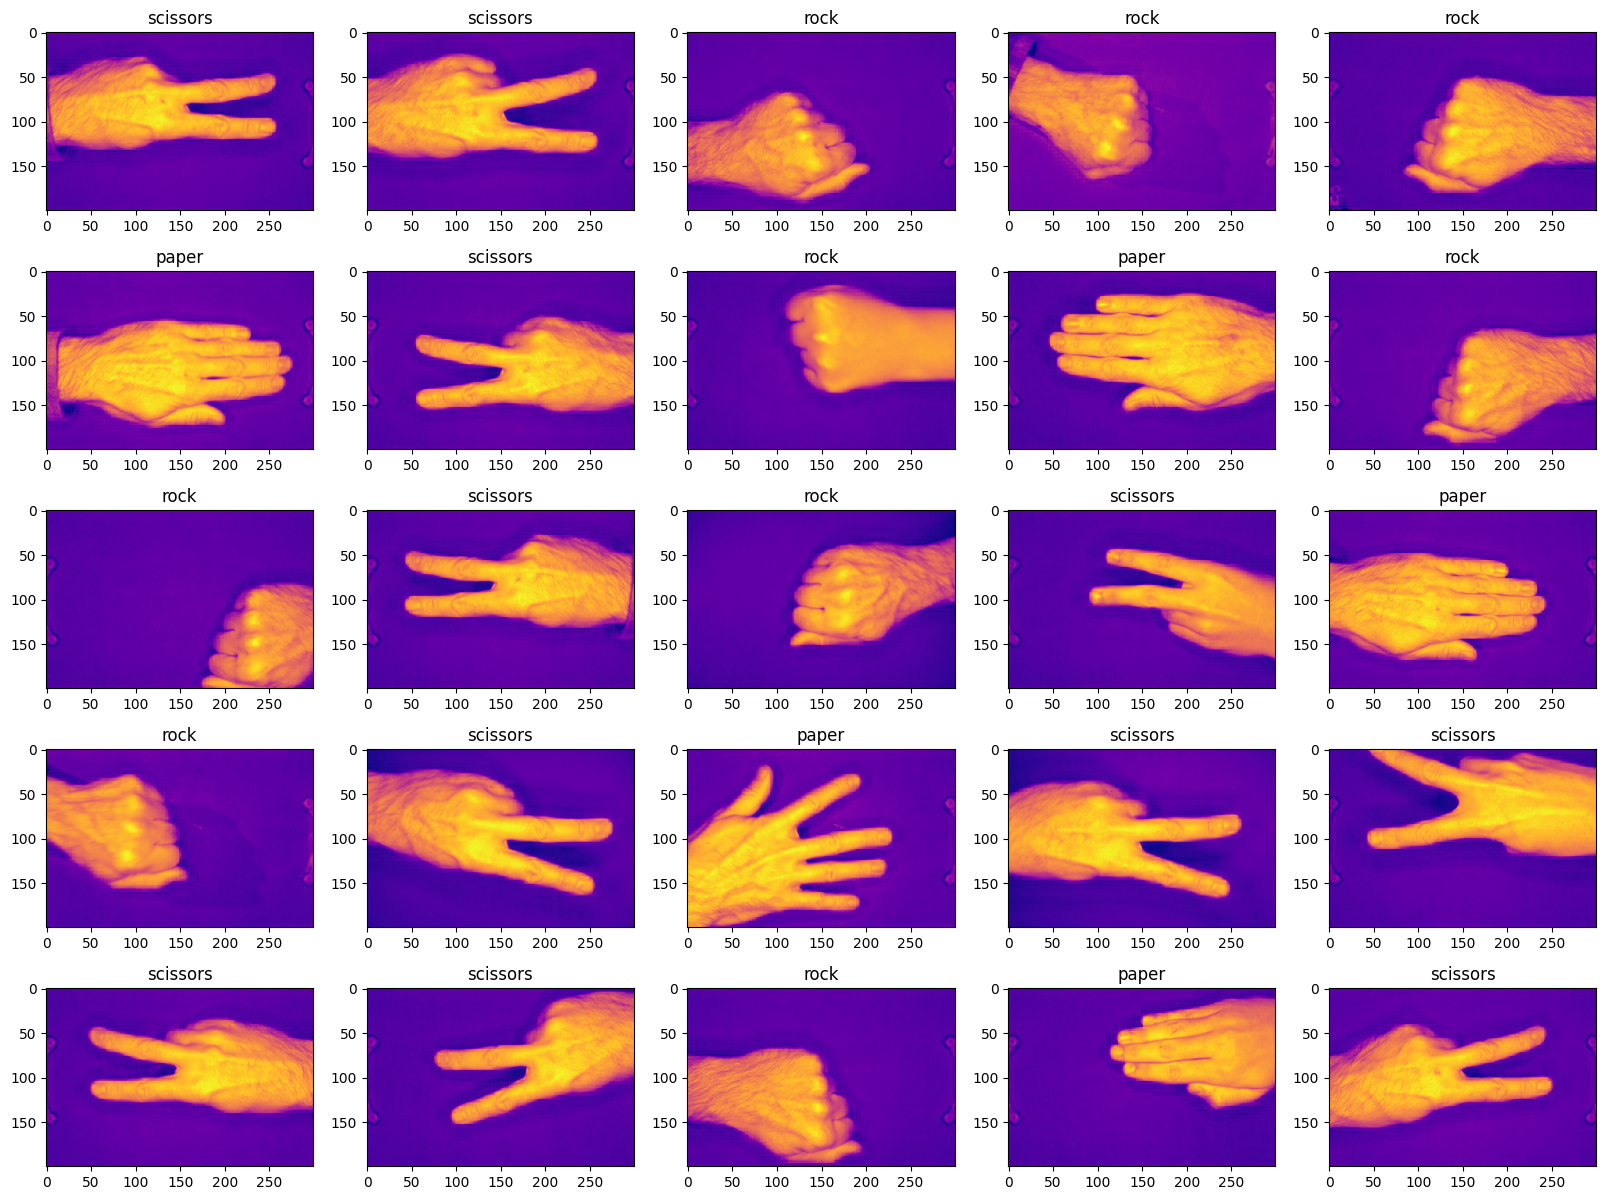

In [22]:
N, M = 5, 5
fig, ax = plt.subplots(N, M, figsize=(20, 15))
for i in range(N):
    for j in range(M):
        img = X_train[np.random.choice(TRAIN_SIZE)]
        ax[i,j].set_title(class_names[knn_model.predict(img.reshape(1,-1))[0]])
        ax[i,j].imshow(img.reshape((200,300)), cmap='plasma')
plt.show()